In [191]:
%load_ext autoreload
%autoreload 2
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from scipy.interpolate import CubicSpline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
extracted_eyes = get_eyes('sample_3.jpg')


In [193]:
cx,cy = get_center(extracted_eyes)

cx,cy 

(208, 158)

#### measurements 

- sample_2.jpg , MRD1 = 4mm 
- sample_3.jpg , MRD1 = 4mm
- sample_4.jpg , MRD1 = 1mm
- sample_5.jpg , MRD1 = 3.5mm 

#### px to mm
- 1 px = 0.264583 mm

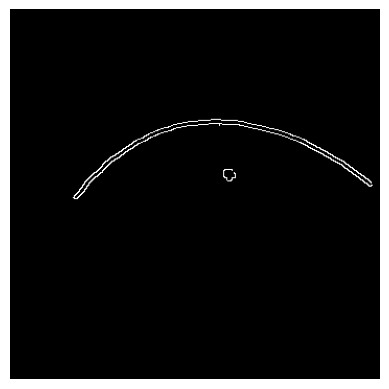

In [194]:
edges = cv2.Canny(extracted_eyes,450,600)
    
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()

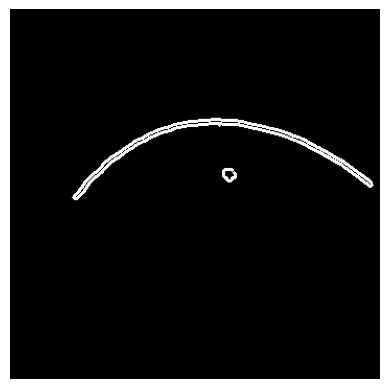

In [195]:

kernel = make_circular_kernel((3,3),1)
edges = cv2.dilate(edges,kernel,iterations=1) 
plt.imshow(edges,cmap='gray')
plt.axis('off')
plt.show()


In [196]:
# draw contours 
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



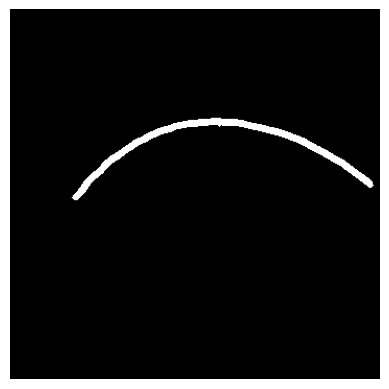

In [197]:
# get the largest contour
largest_contour = max(contours, key=cv2.contourArea)
mask = np.zeros_like(extracted_eyes)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()


In [198]:
# #skeletonize the mask
# from skimage.morphology import skeletonize

# skeleton = skeletonize(mask)
# plt.imshow(skeleton,cmap='gray')
# plt.axis('off')
# plt.show()


In [200]:
# apply cubic spline on the largest contour 
x = largest_contour[:,0,0]
y = largest_contour[:,0,1]



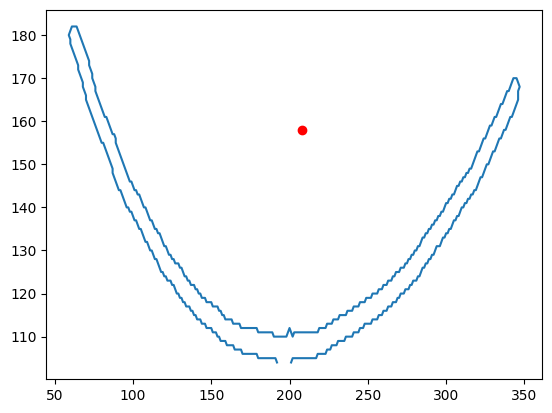

In [201]:
# plot x,y 
# invert the y axis
plt.plot(x, y)
plt.scatter(cx,cy,color='red')
plt.show()

In [212]:
for i in np.where(abs(x-cx)<=5)[0]:
    print(i,x[i],y[i])
    dist = round(np.sqrt((y[i] - cy)**2),2)
    print(np.sqrt(dist) , dist)

140 203 111
3.5270384177096794


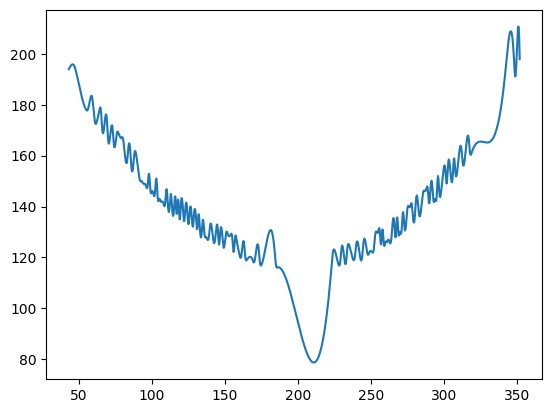

In [137]:
# sort x , y 
sorted_indices = np.argsort(x)
x = x[sorted_indices]
y = y[sorted_indices]

any_dict = dict() # x -> y last value

for i in range(len(x)):
    any_dict[x[i]] = y[i]


spline = CubicSpline(list(any_dict.keys()), list(any_dict.values())) 
x = list(any_dict.keys())
x_new = np.linspace(x[0], x[-1], 1000)
y_new = spline(x_new)

plt.plot(x_new,y_new)

plt.show()


In [98]:
# what's next ? 
# measure our own mrd1 from the picture and compare with the given one (image caption in wp)
# mark (draw) the upper lid contour and get the maximum point (highest y)
# get the distance betweeen the pupil and the highest point of the upper lid contour
# convert px to mm :) 


# after success , 
# GET THE GUI DONE ! like the paper 